<h3>Import necessary library</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

<h3>Read Dataset</h3>

In [2]:
df = pd.read_csv("Iris.csv", usecols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

In [28]:
df.head(80)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
75,6.6,3.0,4.4,1.4
76,6.8,2.8,4.8,1.4
77,6.7,3.0,5.0,1.7
78,6.0,2.9,4.5,1.5


In [6]:
#converting dataframe to numpy array
X = df.to_numpy()

<h2>Choosing the Correct Number of Clusters (K) </h2> <br>

There are two methods that you can use to select the correct value of k:

* Elbow Method
* Silhouette Method

<h3>Elbow Method</h3> <br>

* applies k-means for a range of values of k, and we plot it against the Sum of Squared Error, referred to as a scree plot.

![Image of Yaktocat](https://www.ejable.com/wp-content/uploads/2023/11/elbow-method-2.webp)

The image below shows that the total Sum of Squared Error decreases as we increase the number of Clusters. The Elbow is a point from where there is no significant reduction in the Sum of the Squared Errors, even if the number of clusters increases further. 



<h3>Silhouette Method</h3> <br>

* It calculates the Silhouette coefficient of every point.
  
* A Silhouette Coefficient, or the Silhouette Score, is a metric to calculate the efficiency of a clustering technique, ranging from the values -1 to 1.
  
* The computation of the Silhouette Coefficient takes place for each data point by first determining the average distance from the point to the other points in its cluster, denoted as ‘a’.

* It then measures the average distance from the point to the points in the nearest cluster that it is not a part of, denoted as ‘b’.

* The Silhouette Coefficient is calculated using these average distances.

![Image of Yaktocat](https://www.ejable.com/wp-content/uploads/2023/11/Formula-1a.webp)

import from sklearn : <b>from sklearn.metrics import silhouette_score</b>

<h3>Elbow Method </h3>

In [8]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\us\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h4>Plot the Elbow graph to find the optimum number of cluster</h4>

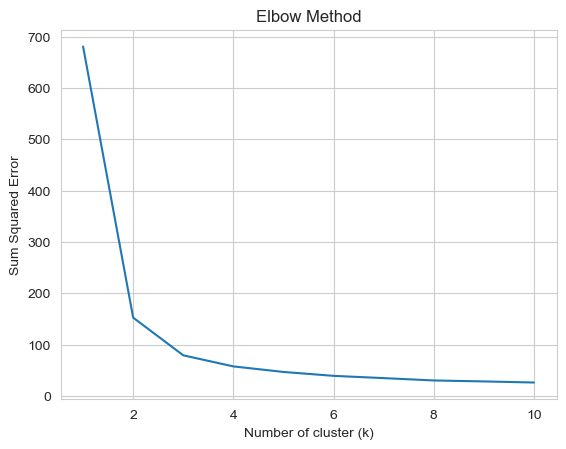

In [9]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

<h3>Build the Kmeans clustering model</h3>

In [14]:
kmeans = KMeans(n_clusters = 2, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=2)

In [15]:
#see values of centroid
kmeans.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

<h4>Predict the cluster group</h4>

In [16]:
pred = kmeans.fit_predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# X[0]

<h4>Plot the cluster center with data points</h4>

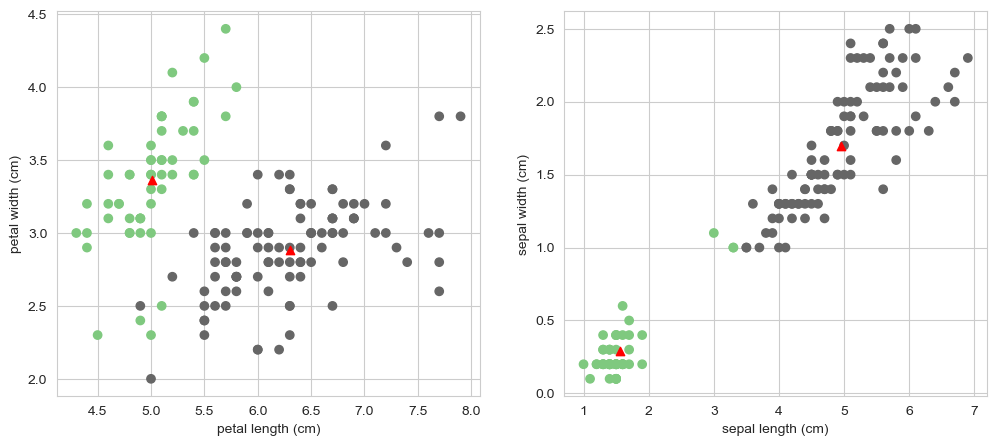

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
     
plt.subplot(1,2,2)   
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [22]:
a=[[5.1, 3.5, 1.4, 0.1]]
pred = kmeans.predict(a)
pred

array([0])

In [19]:
import pickle 

# Save the trained model to a file using pickle
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [66]:
# Load the saved model from the file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)


In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_, metric='euclidean')

0.6808136202936816